In [1]:
from fastai2.vision.all import *

In [3]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  get_y = parent_label,
                  splitter = RandomSplitter(),
                  item_tfms = Resize(224))

In [4]:
dsets = dblock.datasets('squares')
dsets.train[0]

(PILImage mode=RGB size=46x44, TensorCategory(6))

In [5]:
dls = dblock.dataloaders('squares')

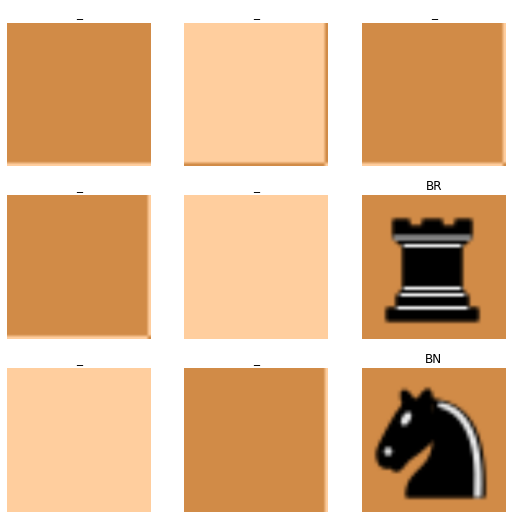

In [6]:
dls.show_batch()

In [7]:
model = cnn_learner(dls, resnet18, metrics=error_rate)

In [8]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.333264,0.000134,0.000000,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.004529,0.000012,0.000000,00:32


In [9]:
model.export()

## Predict

In [3]:
from ipywidgets import widgets
import chess

In [4]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

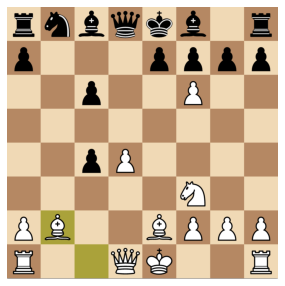

In [7]:
img = PILImage.create(uploader.data[0])
img.show()

In [8]:
w,h = img.shape
w,h

(1043, 1039)

In [9]:
item_list = []
for y in range(8):
    for x in range(8):
        box = (x*w/8, y*h/8, (x+1)*w/8, (y+1)*h/8 ) # left, top, right, bottom
        cropped = img.crop(box)
        square = PILImage.create(cropped.to_bytes_format())
        item_list.append(square) 

In [26]:
learner = load_learner('export.pkl')

In [46]:
dl = learner.dls.test_dl(item_list)
_, __, preds = learner.get_preds(dl=dl, with_decoded=True)

In [51]:
preds

tensor([ 5,  2,  0,  4,  1,  0, 12,  5,  3, 12, 12, 12,  3,  3,  3,  3, 12, 12,
         3, 12, 12,  9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  3,  9,
        12, 12, 12, 12, 12, 12, 12, 12, 12,  8, 12, 12,  9,  6, 12, 12,  6,  9,
         9,  9, 11, 12, 12, 10,  7, 12, 12, 11])

In [55]:
classes = learner.dls.vocab

In [57]:
preds = [classes[pred] for pred in preds]
preds

['BR',
 'BN',
 'BB',
 'BQ',
 'BK',
 'BB',
 '_',
 'BR',
 'BP',
 '_',
 '_',
 '_',
 'BP',
 'BP',
 'BP',
 'BP',
 '_',
 '_',
 'BP',
 '_',
 '_',
 'WP',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'BP',
 'WP',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'WN',
 '_',
 '_',
 'WP',
 'WB',
 '_',
 '_',
 'WB',
 'WP',
 'WP',
 'WP',
 'WR',
 '_',
 '_',
 'WQ',
 'WK',
 '_',
 '_',
 'WR']

In [58]:
label_lib = {
                'WK':'K',
                'WQ':'Q',
                'WR':'R',
                'WB':'B',
                'WN':'N',
                'WP':'P',
                'BK':'k',
                'BQ':'q',
                'BR':'r',
                'BB':'b',
                'BN':'n',
                'BP':'p',
                '_' :'_'
            }

In [59]:
labels = ''.join([label_lib[pred] for pred in preds])

In [60]:
labels

'rnbqkb_rp___pppp__p__P____________pP_________N__PB__BPPPR__QK__R'

In [61]:
def trans_rank(rank):
    new_rank = ''
    empty_counter = 0
    for ch in rank:
        if ch == '_':
            empty_counter+=1
        else:
            if empty_counter>0:
                new_rank += str(empty_counter)
                empty_counter = 0
            new_rank += ch
    if empty_counter > 0:
        new_rank += str(empty_counter)
    return new_rank

def label2fen(label):
    ranks = [trans_rank(label[i:i+8]) for i in range(0, 64, 8)]
    return '/'.join(ranks)

In [64]:
fen = label2fen(labels)
fen

'rnbqkb1r/p3pppp/2p2P2/8/2pP4/5N2/PB2BPPP/R2QK2R'

In [68]:
board = chess.Board(fen)

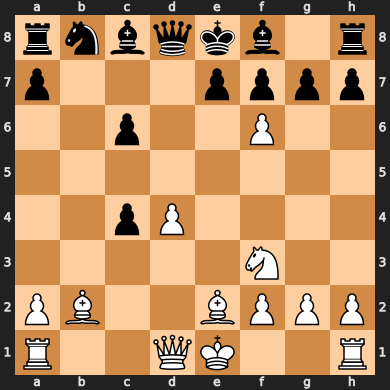

In [69]:
board

## Predict Functions

In [81]:
label_lib = {
                'WK':'K',
                'WQ':'Q',
                'WR':'R',
                'WB':'B',
                'WN':'N',
                'WP':'P',
                'BK':'k',
                'BQ':'q',
                'BR':'r',
                'BB':'b',
                'BN':'n',
                'BP':'p',
                '_' :'_'
            }

In [82]:
def trans_rank(rank):
    new_rank = ''
    empty_counter = 0
    for ch in rank:
        if ch == '_':
            empty_counter+=1
        else:
            if empty_counter>0:
                new_rank += str(empty_counter)
                empty_counter = 0
            new_rank += ch
    if empty_counter > 0:
        new_rank += str(empty_counter)
    return new_rank

def label2fen(label):
    ranks = [trans_rank(label[i:i+8]) for i in range(0, 64, 8)]
    return '/'.join(ranks)

In [83]:
def predict_board(img):
    item_list = []
    for y in range(8):
        for x in range(8):
            box = (x*w/8, y*h/8, (x+1)*w/8, (y+1)*h/8 ) # left, top, right, bottom
            cropped = img.crop(box)
            square = PILImage.create(cropped.to_bytes_format())
            item_list.append(square) 

    dl = learner.dls.test_dl(item_list)
    _, __, preds = learner.get_preds(dl=dl, with_decoded=True)
    preds = [classes[pred] for pred in preds]
    labels = ''.join([label_lib[pred] for pred in preds])
    fen = label2fen(labels)
    
    return fen

In [73]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

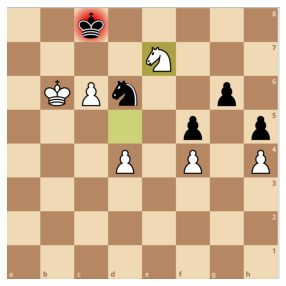

In [80]:
img = PILImage.create(uploader.data[0])
img.show()

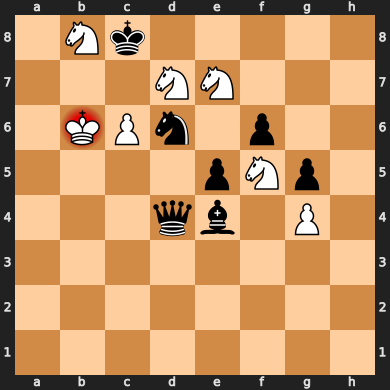

In [85]:
learner = load_learner('export.pkl')
classes = learner.dls.vocab
fen = predict_board(img)
board = chess.Board(fen)
board